<a href="https://colab.research.google.com/github/SSRaylia/Prediction-Using-Machine-Learning/blob/master/2019_UC_Davis_MSBA_Hackthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **This is our team project for UC Davis MSBA 2019 Hachthon. We are required to build model to make prediction of a patient's cancer stage, most appropriate surgery, and survival rate.**



# Ingest

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
raw = pd.read_csv("gdrive/My Drive/Machine Learning/LungCancerDatav5.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,26,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

In [0]:
#get data start from 2004
cancerdata = raw[raw["Year of diagnosis"] > 2003]

In [0]:
#drop unnessary data
cancer = cancerdata.drop(["T value - based on AJCC 3rd (1988-2003)","N value - based on AJCC 3rd (1988-2003)",
                         "M value - based on AJCC 3rd (1988-2003)","Derived AJCC T, 7th ed (2010+)",
                         "Derived AJCC N, 7th ed (2010+)","Race/ethnicity","NHIA Derived Hisp Origin",
                         "Derived AJCC M, 7th ed (2010+)","Regional nodes examined (1988+)",
                         "Regional nodes positive (1988+)","RX Summ--Surg Prim Site (1998+)",
                         "Scope of reg lymph nd surg (1998-2002)","RX Summ--Reg LN Examined (1998-2002)",
                         "Surgery of oth reg/dis sites (1998-2002)",
                         "Site specific surgery (1973-1997 varying detail by year and site)",
                         "Radiation to Brain or CNS Recode (1988-1997)"], axis=1)
cancer = cancer[cancer["Survival months"] != "Unknown"]

In [0]:
#creat status("Success"or "Failure")
#Only those who a survival months larger than 60 will be marked as "Success", those with a survival months less than 60 will not be marked as failure unless the patient 
#receive treatment more than 5 years ago.
cancer["Survival months"] = pd.to_numeric(cancer["Survival months"], downcast='signed')
cancer['Status'] = np.where(cancer['Survival months']>=60, "Success", "Failure")
cancer['check'] = cancer['Status'] + cancer['Vital status recode (study cutoff used)']
cancer = cancer[cancer["check"] != "FailureAlive"]
cancer.drop(['check'],axis = 1, inplace = True)

In [0]:
cancer.shape

(510162, 35)

In [0]:
cancer.dropna(inplace=True)
#subset=['Derived AJCC T, 6th ed (2004+)', 'Derived AJCC N, 6th ed (2004+)','Derived AJCC M, 6th ed (2004+)'],

In [0]:
cancer.dropna(inplace=True)
cancer.isna().values.any()

False

In [0]:
cancer.shape

(504008, 35)

In [0]:
#Define patient stage according to professional defination. 

def final_winner(cancer):
    if cancer['Derived AJCC M, 6th ed (2004+)']=='MX':
        return "Unable to Identify"
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M1':
        return "IV"
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='NX':
        return "Unable to Identify"
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N3':
        return "IIIB"    
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N2' and cancer['Derived AJCC T, 6th ed (2004+)']=='TX':
        return "Unable to Identify"        
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N2' and (cancer['Derived AJCC T, 6th ed (2004+)']=='T1' or cancer['Derived AJCC T, 6th ed (2004+)']=='T2'or cancer['Derived AJCC T, 6th ed (2004+)']=='T3'):
        return "IIIA"      
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N2' and cancer['Derived AJCC T, 6th ed (2004+)']=='T4':
        return "IIIB"       
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N1' and cancer['Derived AJCC T, 6th ed (2004+)']=='TX':
        return "Unable to Identify"       
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N1' and (cancer['Derived AJCC T, 6th ed (2004+)']=='T1' or cancer['Derived AJCC T, 6th ed (2004+)']=='T2'):
        return "IIA"     
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N1' and (cancer['Derived AJCC T, 6th ed (2004+)']=='T3' or cancer['Derived AJCC T, 6th ed (2004+)']=='T4'):
        return "IIIA"  
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N0' and cancer['Derived AJCC T, 6th ed (2004+)']=='TX':
        return "Unable to Identify"  
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N0' and cancer['Derived AJCC T, 6th ed (2004+)']=='T1':
        return "IA"   
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N0' and cancer['Derived AJCC T, 6th ed (2004+)']=='T2':
        return "IB"     
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N0' and cancer['Derived AJCC T, 6th ed (2004+)']=='T3':
        return "IIB"      
    elif cancer['Derived AJCC M, 6th ed (2004+)']=='M0'and cancer['Derived AJCC N, 6th ed (2004+)']=='N0' and cancer['Derived AJCC T, 6th ed (2004+)']=='T4':
        return "IIIA"       
    else:
        return "NA"

cancer['group_stage'] = cancer.apply(final_winner, axis=1)

In [0]:
cancer['group_stage'].unique()

array(['IB', 'IIIA', 'IV', 'IA', 'Unable to Identify', 'IIIB', 'IIA',
       'IIB', 'NA'], dtype=object)

In [0]:
cancer.dropna(inplace=True)
cancer.isna().values.any()

False

In [0]:
cancer_copy=cancer.copy()

# EDA

In [0]:
test1=pd.DataFrame(cancer.iloc[0:3])

In [0]:
test1.transpose()

,15,27,34
Patient ID,333,532,646
Age recode with <1 year olds,75-79 years,75-79 years,70-74 years
Age at diagnosis,78,78,73
Year of birth,1928,1928,1933
Year of diagnosis,2006,2006,2007
Sex,Female,Male,Female
"Race recode (W, B, AI, API)",White,White,White
"Origin recode NHIA (Hispanic, Non-Hisp)",Non-Spanish-Hispanic-Latino,Non-Spanish-Hispanic-Latino,Non-Spanish-Hispanic-Latino
State-county,CA: Contra Costa County (06013),CA: Alameda County (06001),CA: Contra Costa County (06013)
Grade,Well differentiated; Grade I,Poorly differentiated; Grade III,Unknown


# Model

In [0]:
cancer_model=cancer_copy[['Age at diagnosis','Year of diagnosis','Sex','Race recode (W, B, AI, API)','group_stage',
                          'CS Reg Node Eval (2004+)',
                          'CS Mets Eval (2004+)','RX Summ--Scope Reg LN Sur (2003+)',
                          'RX Summ--Surg Oth Reg/Dis (2003+)', 'Radiation sequence with surgery',
                          'Radiation recode','Chemotherapy recode (yes, no/unk)', 'Survival months']]

In [0]:
cancer_model.head(3)

,Age at diagnosis,Year of diagnosis,Sex,"Race recode (W, B, AI, API)",group_stage,CS Reg Node Eval (2004+),CS Mets Eval (2004+),RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Oth Reg/Dis (2003+),Radiation sequence with surgery,Radiation recode,"Chemotherapy recode (yes, no/unk)",Survival months
15,78,2006,Female,White,IB,3,0,4 or more regional lymph nodes removed,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,None/Unknown,No/Unknown,109
27,78,2006,Male,White,IB,3,0,4 or more regional lymph nodes removed,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,None/Unknown,No/Unknown,5
34,73,2007,Female,White,IIIA,0,0,None,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,None/Unknown,No/Unknown,0


In [0]:
mapping = {'Female': 0, 'Male': 1 }
cancer_model=cancer_model.replace({'Sex': mapping})
cancer_model["Sex"] = pd.to_numeric(cancer_model["Sex"])

In [0]:
mapping = {'White': 1, 'Black': 2,'American Indian/Alaska Native':3,'Asian or Pacific Islander':4, 'Unknown':0 }
cancer_model=cancer_model.replace({'Race recode (W, B, AI, API)': mapping})
cancer_model["Race recode (W, B, AI, API)"] = pd.to_numeric(cancer_model["Race recode (W, B, AI, API)"])

In [0]:
mapping = {'IA': 1, 'IB': 2,'IIA':3,'IIB':4, 'IIIA':5, 'IIIB':6, 'IV':7, 'Unable to Identify':0,'NA':0 }
cancer_model=cancer_model.replace({'group_stage': mapping})
cancer_model["group_stage"] = pd.to_numeric(cancer_model["group_stage"])

In [0]:
cancer_model = cancer_model[cancer_model['CS Reg Node Eval (2004+)'] != "Blank(s)"]
cancer_model = cancer_model[cancer_model['CS Mets Eval (2004+)'] != "Blank(s)"]

In [0]:
cancer_model.dropna(inplace=True)
cancer.isna().values.any()

False

In [0]:
cancer_model.head()

,Age at diagnosis,Year of diagnosis,Sex,"Race recode (W, B, AI, API)",group_stage,CS Reg Node Eval (2004+),CS Mets Eval (2004+),RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Oth Reg/Dis (2003+),Radiation sequence with surgery,Radiation recode,"Chemotherapy recode (yes, no/unk)",Survival months
15,78,2006,0,1,2,3,0,4 or more regional lymph nodes removed,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,None/Unknown,No/Unknown,109
27,78,2006,1,1,2,3,0,4 or more regional lymph nodes removed,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,None/Unknown,No/Unknown,5
34,73,2007,0,1,5,0,0,None,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,None/Unknown,No/Unknown,0
39,76,2011,0,1,7,0,0,None,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,None/Unknown,No/Unknown,3
42,79,2009,0,1,1,0,0,None,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,"Radiation, NOS method or source not specified",No/Unknown,68


## MODELING

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [0]:
########
y = cancer_model['RX Summ--Scope Reg LN Sur (2003+)'].values #Target
# y = y.reshape(-1, 1)
X = cancer_model.drop(['RX Summ--Scope Reg LN Sur (2003+)','RX Summ--Surg Oth Reg/Dis (2003+)', 'Radiation sequence with surgery',
       'Radiation recode', 'Chemotherapy recode (yes, no/unk)',
       'Survival months'], axis=1).values #Feature(s)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)


In [0]:
X_train

array([[71, 2014, 1, ..., 7, '0', '0'],
       [64, 2004, 1, ..., 0, '9', '9'],
       [85, 2014, 0, ..., 7, '1', '0'],
       ...,
       [65, 2009, 0, ..., 0, '9', '9'],
       [80, 2009, 0, ..., 0, '0', '0'],
       [70, 2013, 0, ..., 7, '0', '3']], dtype=object)

In [0]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
pred_neigh = neigh.predict(X_test)

/Users/xing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [0]:
print(classification_report(y_test, pred_neigh))

                                                            precision    recall  f1-score   support

                       1 to 3 regional lymph nodes removed       0.27      0.25      0.26      3925
                    4 or more regional lymph nodes removed       0.69      0.75      0.72     10538
          Biopsy or aspiration of regional lymph node, NOS       0.45      0.31      0.37      4017
                                                      None       0.94      0.97      0.95     75603
            Number of regional lymph nodes removed unknown       0.10      0.02      0.03       942
                                Sentinel lymph node biopsy       0.00      0.00      0.00        41
   Sentinel node biopsy and lym nd removed different times       0.00      0.00      0.00        28
Sentinel node biopsy and lym nd removed same/unstated time       0.00      0.00      0.00        39
                                 Unknown or not applicable       0.29      0.13      0.18      2041

/Users/xing/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from yellowbrick.classifier import ConfusionMatrix

/Users/xing/anaconda3/lib/python3.6/site-packages/yellowbrick/classifier/base.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.estimator.fit(X, y)


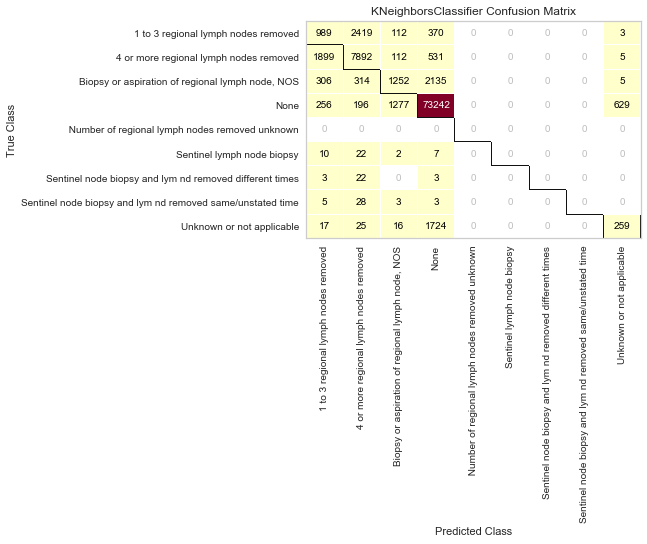

In [0]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(neigh, classes=["1 to 3 regional lymph nodes removed","4 or more regional lymph nodes removed",
                                     "Biopsy or aspiration of regional lymph node, NOS","None"," Number of regional lymph nodes removed unknown",
                                     "Sentinel lymph node biopsy","Sentinel node biopsy and lym nd removed different times",
                                     "Sentinel node biopsy and lym nd removed same/unstated time","Unknown or not applicable"])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()